# Advanced Matplotlib

We'll now explore some of the more detailed and advanced functionalities available in Matplotlib.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Visualizing Errors
For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. For example, imagine that you am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe. You know that the current literature suggests a value of around 71 (km/s)/Mpc, and you measure a value of 74 (km/s)/Mpc with your method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose you can augment this information with reported uncertainties: the current literature suggests a value of around 71 ± 2.5 (km/s)/Mpc, and your method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered!

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

### Basic Errorbars
A basic errorbar can be created with a single Matplotlib function call.

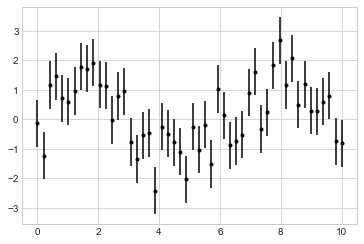

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ```fmt``` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ```plt.plot```, outlined in the previous tutorial.

In addition to these basic options, the ```errorbar``` function has many options to fine-tune the outputs. Using these additional options, you can easily customize the aesthetics of your errorbar plot. It is often helpful, especially in crowded plots, to make the errorbars lighter than the points themselves.

In addition to these options, you can also specify horizontal errorbars (xerr), one-sided errorbars, and many other variants. For more information on the options available, refer to the docstring of plt.errorbar.

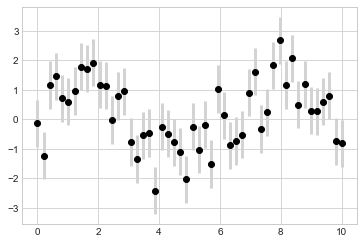

In [5]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

### Continuous Errors
n some situations it is desirable to show errorbars on continuous quantities. Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like ```plt.plot``` and ```plt.fill_between``` for a useful result.

Here we'll perform a simple Gaussian process regression, using the Scikit-Learn API. This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty. We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement.

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(xdata[:,np.newaxis],ydata)
xfit = np.linspace(0,10,1000)
yfit, sigma = gp.predict(xfit[:,np.newaxis], return_std=True)
dyfit = 2*sigma

We now have ```xfit```, ```yfit```, and ```dyfit```, which sample the continuous fit to our data. We could pass these to the ```plt.errorbar``` function as above, but we don't really want to plot 1,000 points with 1,000 errorbars. Instead, we can use the ```plt.fill_between``` function with a light color to visualize this continuous error.

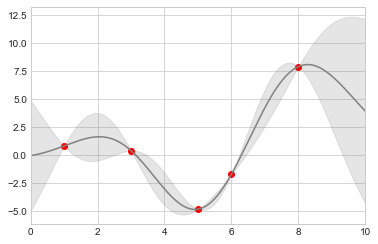

In [18]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Note what we've done here with the ```fill_between``` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors. In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

## Histogram Plots
A simple histogram can be a great first step in understanding a dataset.

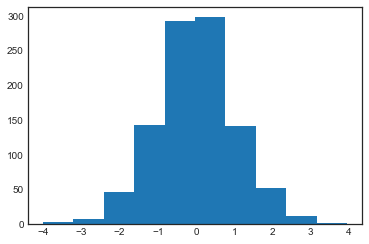

In [23]:
data = np.random.randn(1000)
plt.hist(data);

The ```hist()``` function has many options to tune both the calculation and the display. The combination of histtype='stepfilled' along with some transparency alpha is very useful when comparing histograms of several distributions

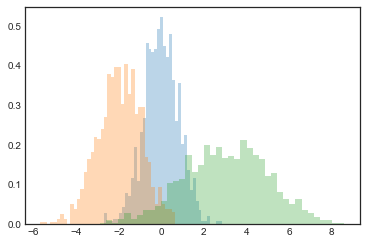

In [26]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Customizing Plot Legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ```plt.legend()``` command, which automatically creates a legend for any labeled plot elements. But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame.

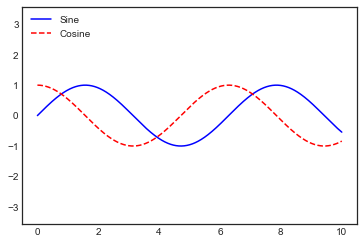

In [34]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(loc='upper left', frameon=False);

We can use the ```ncol``` command to specify the number of columns in the legend.

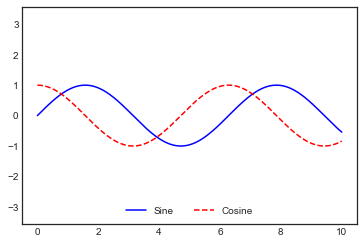

In [35]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (```fancybox```) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text.

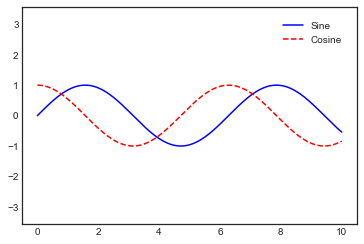

In [36]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

As we have already seen, the legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. The ```plt.plot()``` command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to ```plt.legend()``` will tell it which to identify, along with the labels we'd like to specify.

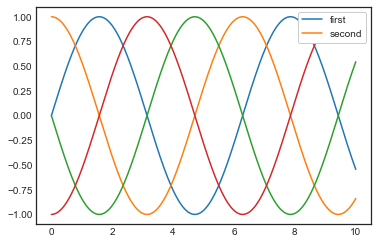

In [43]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'],loc='upper right',frameon=True,framealpha=1);

## Legend for Size of Points
Sometimes the legend defaults are not sufficient for the given visualization. For example, perhaps you're using the size of points to mark certain features of the data, and want to create a legend reflecting this. Here is an example where we'll use the size of points to indicate populations of California cities. We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries.

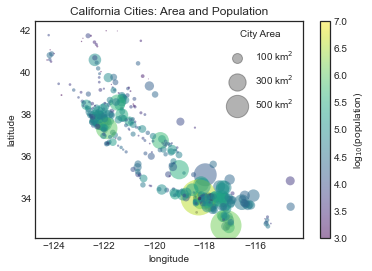

In [47]:
import pandas as pd
cities = pd.read_csv('../Data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements. For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit, which we'll explore later in the next tutorial.

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information.

We'll use a dataset on birthdays and perform some data cleaning before illustrating text annotation.

### Example: Effect of Holidays on US Births

In [51]:
from datetime import datetime
births = pd.read_csv('../Data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

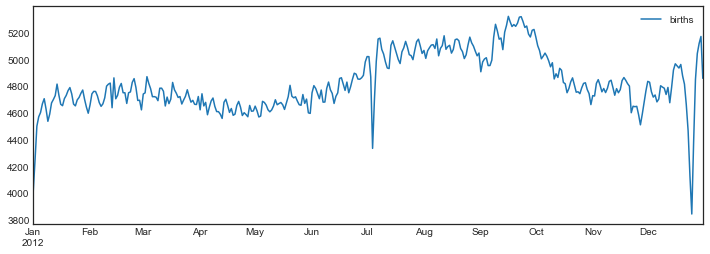

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. This can be done manually with the ```plt.text```/```ax.text``` command, which will place text at a particular x/y value.

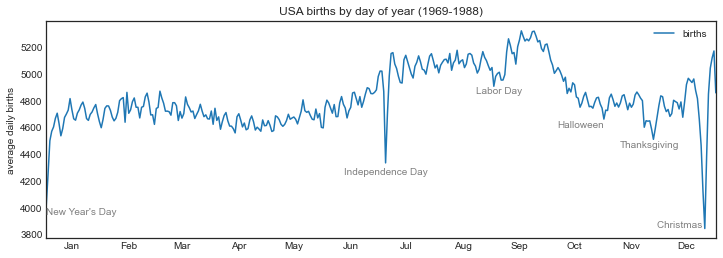

In [54]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ```ax.text``` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text. Here we used ``ha='right'`` and ```ha='center'```, where ```ha``` is short for horizonal alignment. See the docstring of ```plt.text()``` and of ```mpl.text.Text()``` for more information on available options.

### Transforms and Text Position
In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the transform.

Any graphics display framework needs some scheme for translating between coordinate systems. For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen. Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ```matplotlib.transforms``` submodule).

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ```ax.transData```: Transform associated with data coordinates
- ```ax.transAxes```: Transform associated with the axes (in units of axes dimensions)
- ```fig.transFigure```: Transform associated with the figure (in units of figure dimensions)

Let's look at an example of drawing text at various locations using these transforms.

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

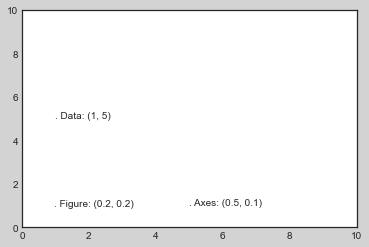

In [55]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

The transData coordinates give the usual data coordinates associated with the x- and y-axis labels. The transAxes coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size. The transFigure coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

### Arrows and Annotations
Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for. While there is a ```plt.arrow()``` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended. Instead, I'd suggest using the ```plt.annotate()``` function. This function creates some text and an arrow, and the arrows can be very flexibly specified. Here we'll use annotate with several of its options.

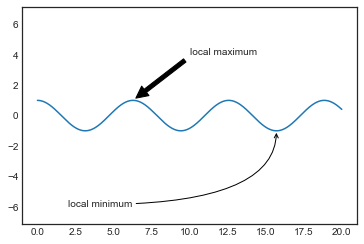

In [56]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the arrowprops dictionary, which has numerous options available. These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities. Let's demonstrate several of the possible options using the birthrate plot from before.

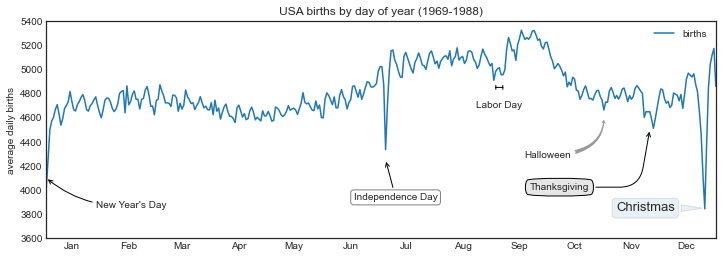

In [57]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish. Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics! Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.